# Example 1. Authorizing an application to access NewsAPI data

In [82]:
! pip install newsapi-python

In [83]:
from newsapi import NewsApiClient

# See https://newsapi.org/docs for more information
# on NewsAPI implementation.

API_KEY = 'f16fc93abc7740c48c9526c523229a15'

newsapi = NewsApiClient(api_key=API_KEY)
print(newsapi)

# Example 2.  All possible sources and retrieving top headlines

In [84]:
sources = newsapi.get_sources()

In [85]:
print(sources)

{'status': 'ok', 'sources': [{'id': 'abc-news', 'name': 'ABC News', 'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.', 'url': 'https://abcnews.go.com', 'category': 'general', 'language': 'en', 'country': 'us'}, {'id': 'abc-news-au', 'name': 'ABC News (AU)', 'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.", 'url': 'http://www.abc.net.au/news', 'category': 'general', 'language': 'en', 'country': 'au'}, {'id': 'aftenposten', 'name': 'Aftenposten', 'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.', 'url': 'https://www.aftenposten.no', 'category': 'general', 'language': 'no', 'country': 'no'}, {'id': 'al-jazeera-english', 'name': 'Al Jazeera English', 'description': 'News, analysis from the Middle East and worldwide, multim

In [86]:
top_headlines = newsapi.get_top_headlines(#q='bitcoin',
                                          #sources='bbc-news,the-verge',
                                          #category='business',
                                          language='en',
                                          country='us'
                                          )

In [87]:
print(top_headlines)

{'status': 'ok', 'totalResults': 36, 'articles': [{'source': {'id': 'espn', 'name': 'ESPN'}, 'author': 'Todd Archer', 'title': 'Cowboys score offensive, defensive TDs, then tack on a safety vs. Rams - ESPN - ESPN', 'description': "The Cowboys racked up points from all angles early in Sunday's game, including a safety off a blocked punt.", 'url': 'https://www.espn.com/nfl/story/_/id/38772036/cowboys-dak-prescott-jake-ferguson-td-rams', 'urlToImage': 'https://a3.espncdn.com/combiner/i?img=%2Fphoto%2F2023%2F1029%2Fr1245462_1296x729_16%2D9.jpg', 'publishedAt': '2023-10-29T18:26:18Z', 'content': "ARLINGTON, Texas -- Just 16 minutes, 21 seconds into Sunday's game against the Los Angeles Rams, the Dallas Cowboys had points from their offense, defense and special teams.\r\nOne was expected: tight … [+2603 chars]"}, {'source': {'id': None, 'name': '[Removed]'}, 'author': None, 'title': '[Removed]', 'description': '[Removed]', 'url': 'https://removed.com', 'urlToImage': None, 'publishedAt': '197

# Saving data!

Very important!

![important](https://media.istockphoto.com/photos/important-picture-id186613912?k=6&m=186613912&s=612x612&w=0&h=bMibIfwwjrEW93VWjr3f-wCJwrNn5nyX4TqfitGxwAk=)

In [88]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
! ls gdrive/MyDrive/ds3010_2023

foo.txt


In [90]:
# Temporary for this session
import json
data= json.dumps(top_headlines, indent=1)

file = open('foo.txt','w')
file.write(data)
file.close()

In [91]:
# Saved for later sessions!
data= json.dumps(top_headlines, indent=1)

file = open('gdrive/MyDrive/ds3010_2023/foo.txt','w')
file.write(data)
file.close()

In [92]:
file = open('gdrive/MyDrive/ds3010_2023/foo.txt','r')
foo = file.read()
d = json.loads(foo)

print(len(d['articles']))
for article in d['articles']:
  print(f"author: {article['author']}")
  print(f"title: {article['title']}")
  print(f"description: {article['description']}")

20
author: Todd Archer
title: Cowboys score offensive, defensive TDs, then tack on a safety vs. Rams - ESPN - ESPN
description: The Cowboys racked up points from all angles early in Sunday's game, including a safety off a blocked punt.
author: None
title: [Removed]
description: [Removed]
author: Rebecca Picciotto, Natasha Turak, Joanna Tan
title: Israel-Hamas war live updates: Thousands break into UN warehouses in Gaza; Israel vows to continue 'large scale' strikes - CNBC
description: Israel has pledged to keep up with its "large scale, significant strikes" in the besieged Gaza Strip.
author: Gabrielle Tétrault-Farber
title: Gazans break into aid centres, taking flour and supplies, UN says - Reuters.com
description: Thousands of Gaza residents broke into U.N. warehouses on Sunday, grabbing flour and other essential items in a sign they had reached "breaking point", the United Nations Palestinian refugee agency (UNRWA) said.
author: Bailey Schulz
title: S&P 500 and Nasdaq are in correct

## Back to slides

# Example 3. Displaying API responses as pretty-printed JSON

In [93]:
import json
print(json.dumps(top_headlines, indent=1))

{
 "status": "ok",
 "totalResults": 36,
 "articles": [
  {
   "source": {
    "id": "espn",
    "name": "ESPN"
   },
   "author": "Todd Archer",
   "title": "Cowboys score offensive, defensive TDs, then tack on a safety vs. Rams - ESPN - ESPN",
   "description": "The Cowboys racked up points from all angles early in Sunday's game, including a safety off a blocked punt.",
   "url": "https://www.espn.com/nfl/story/_/id/38772036/cowboys-dak-prescott-jake-ferguson-td-rams",
   "urlToImage": "https://a3.espncdn.com/combiner/i?img=%2Fphoto%2F2023%2F1029%2Fr1245462_1296x729_16%2D9.jpg",
   "publishedAt": "2023-10-29T18:26:18Z",
   "content": "ARLINGTON, Texas -- Just 16 minutes, 21 seconds into Sunday's game against the Los Angeles Rams, the Dallas Cowboys had points from their offense, defense and special teams.\r\nOne was expected: tight \u2026 [+2603 chars]"
  },
  {
   "source": {
    "id": null,
    "name": "[Removed]"
   },
   "author": null,
   "title": "[Removed]",
   "description": "

In [94]:
for i in range(5):
    print(top_headlines['articles'][i]['url'])

https://www.espn.com/nfl/story/_/id/38772036/cowboys-dak-prescott-jake-ferguson-td-rams
https://removed.com
https://www.cnbc.com/2023/10/29/israel-hamas-war-live-updates-latest-news-on-gaza-conflict.html
https://www.reuters.com/world/middle-east/gazans-break-into-aid-centres-taking-flour-supplies-un-says-2023-10-29/
https://www.usatoday.com/story/money/2023/10/29/stock-market-correction-territory-meaning/71349135007/


In [95]:
from IPython.display import Image
from IPython.core.display import HTML

for i in range(5):
  print(top_headlines['articles'][i]['title'])
  try:
    image = Image(url=top_headlines['articles'][i]['urlToImage'])
    display(image)
  except ValueError:
    print('no image')

Cowboys score offensive, defensive TDs, then tack on a safety vs. Rams - ESPN - ESPN


[Removed]
no image
Israel-Hamas war live updates: Thousands break into UN warehouses in Gaza; Israel vows to continue 'large scale' strikes - CNBC


Gazans break into aid centres, taking flour and supplies, UN says - Reuters.com


S&P 500 and Nasdaq are in correction territory. What it means for you and your 401(k). - USA TODAY


# Example 4. Collecting search results

In [96]:
#  Set this variable to a trending topic,
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

#q = 'Kayne'
#q = 'Paffenroth'
#q = 'pickleball'
#q = 'toyota'
q = 'boxing'
#q = "andrew"

all_articles = newsapi.get_everything(q=q,
                                      #sources='bbc-news,the-verge',
                                      #domains='bbc.co.uk,techcrunch.com',
                                      from_param='2023-10-01',
                                      to='2023-11-02',
                                      language='en',
                                      sort_by='relevancy',
                                      #page=2
                                      )

# Show one sample search result by slicing the list...
print(json.dumps(all_articles, indent=4))


{
    "status": "ok",
    "totalResults": 3396,
    "articles": [
        {
            "source": {
                "id": "business-insider",
                "name": "Business Insider"
            },
            "author": "Azmi Haroun",
            "title": "She fled Ukraine and found belonging with her Russian boxing coach in America",
            "description": "Anzelika Akimova shared with Insider how she fled Russian attacks and adapted to her new American life at an Eastern European boxing gym in LA.",
            "url": "https://www.businessinsider.com/russian-boxing-trainer-giving-ukrainian-refugee-fighting-spirit-2023-4",
            "urlToImage": "https://i.insider.com/651f0c926561dd877e72065d?width=1200&format=jpeg",
            "publishedAt": "2023-10-08T10:23:01Z",
            "content": "Anzelika Akimova, 33, struggled to find her footing in the US after making the arduous journey from her hometown in Odesa, through Eastern Europe and Mexico, finally landing in Los Angeles

## Back to slides

# Example 5. Extracting authors, sources, and descriptions from articles

In [97]:
import time

authors = [ article['author'] for article in all_articles['articles'] ]

sources = [ article['source']['name'] for article in all_articles['articles'] ]

descriptions = [ article['description'] for article in all_articles['articles'] ]

# Compute a collection of all words from all tweets
words = [ w
          for d in descriptions
              for w in d.split() ]

# Explore the first 5 items for each...

print(json.dumps(authors[0:5], indent=1))
print(json.dumps(sources[0:5], indent=1))
print(json.dumps(descriptions[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "Azmi Haroun",
 "Quentyn Kennemer",
 "Quentyn Kennemer",
 "ESPN",
 "Mike Coppinger"
]
[
 "Business Insider",
 "Business Insider",
 "Business Insider",
 "ESPN",
 "ESPN"
]
[
 "Anzelika Akimova shared with Insider how she fled Russian attacks and adapted to her new American life at an Eastern European boxing gym in LA.",
 "Tyson Fury is locked into a late-year contract to fight former UFC champion Francis Ngannou. Here's where to watch this dream crossover boxing bout live.",
 "Tommy Fury and KSI are finally stepping into the squared circle. Here's where to watch these undefeated stars protect their perfect records.",
 "Two very interesting matchups, plus an undercard that includes a boxing tag team match. Follow live.",
 "Boxing trainer Brian McIntyre has been released from jail in England and is free to travel home to the U.S."
]
[
 "Anzelika",
 "Akimova",
 "shared",
 "with",
 "Insider"
]


# Example 6. Creating a basic frequency distribution from the words in articles

In [98]:
from collections import Counter

for item in [authors, sources, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[(None, 36), ('https://www.facebook.com/bbcnews', 4), ('Mike Chiari', 4), ('ESPN', 3), ('Noah McGraw', 3), ('Lyle Fitzsimmons', 3), ('TMZ Staff', 3), ('Quentyn Kennemer', 2), ('Alex Ballentine', 2), ('Josh Katzowitz, Contributor, \n Josh Katzowitz, Contributor\n https://www.forbes.com/sites/joshkatzowitz/', 2)]
[('BBC News', 36), ('Bleacher Report', 13), ('ESPN', 9), ('Digital Trends', 5), ('Business Insider', 4), ('Deadline', 4), ('Al Jazeera English', 3), ('TMZ', 3), ('The New Yorker', 2), ('GQ Magazine', 2)]
[('the', 115), ('to', 69), ('a', 57), ('in', 55), ('and', 53), ('of', 44), ('on', 37), ('his', 30), ('boxing', 27), ('is', 25)]


# Example 7. Using prettytable to display tuples in a nice tabular format

In [99]:
from prettytable import PrettyTable

for label, data in (('Word', words),
                    ('Author', authors),
                    ('Source', sources)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------+-------+
| Word   | Count |
+--------+-------+
| the    |   115 |
| to     |    69 |
| a      |    57 |
| in     |    55 |
| and    |    53 |
| of     |    44 |
| on     |    37 |
| his    |    30 |
| boxing |    27 |
| is     |    25 |
+--------+-------+
+----------------------------------------------+-------+
| Author                                       | Count |
+----------------------------------------------+-------+
| None                                         |    36 |
| https://www.facebook.com/bbcnews             |     4 |
| Mike Chiari                                  |     4 |
| ESPN                                         |     3 |
| Noah McGraw                                  |     3 |
| Lyle Fitzsimmons                             |     3 |
| TMZ Staff                                    |     3 |
| Quentyn Kennemer                             |     2 |
| Alex Ballentine                              |     2 |
| Josh Katzowitz, Contributor,                 |  

## Back to slides

# Example 8. Calculating lexical diversity for articles

In [100]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(average_words(descriptions))

0.47483417869683964
25.63


## Back to slides

#  Example 9. Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

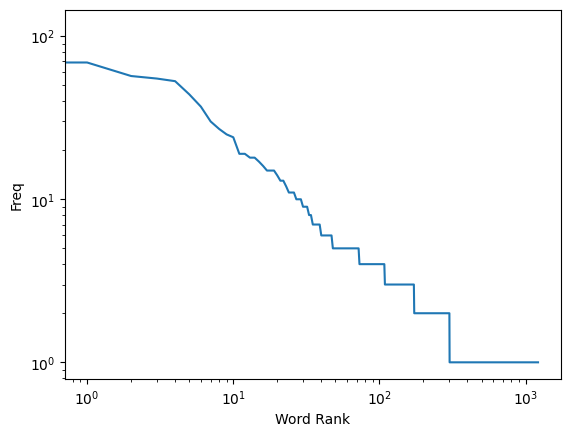

In [101]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Example 10. Image segmentation using Hugging Face

In [102]:
pip install -q datasets transformers evaluate timm albumentations


In [103]:
from huggingface_hub import notebook_login

notebook_login()

In [104]:
for i in range(5):
  print(all_articles['articles'][i]['title'])
  try:
    image_url = all_articles['articles'][i]['urlToImage']
    article = all_articles['articles'][i]
    image = Image(url=image_url)
    display(image)
    break
  except ValueError:
    print('no image')

# for i in range(5):
#   print(top_headlines['articles'][i]['title'])
#   try:
#     image_url = top_headlines['articles'][i]['urlToImage']
#     article = top_headlines['articles'][i]
#     image = Image(url=image_url)
#     display(image)
#     break
#   except ValueError:
#     print('no image')

She fled Ukraine and found belonging with her Russian boxing coach in America


In [105]:
from transformers import pipeline
import requests
from PIL import Image, ImageDraw


In [106]:
image = Image.open(requests.get(image_url, stream=True).raw)

In [107]:
obj_detector = pipeline("object-detection")


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

In [108]:
results = obj_detector(image)

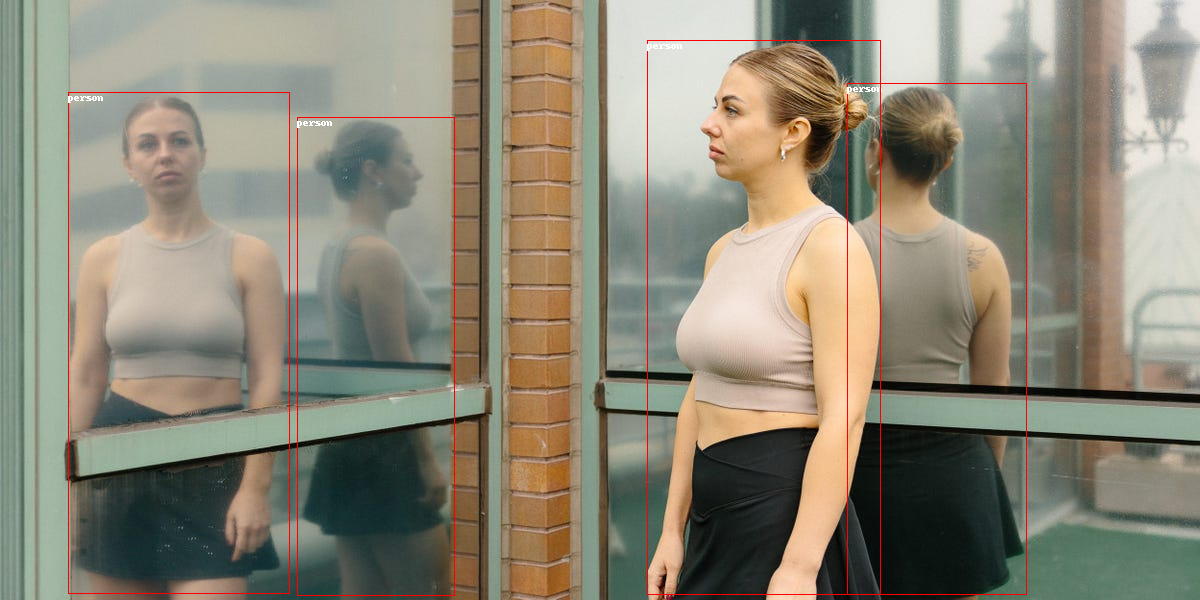

In [109]:
draw = ImageDraw.Draw(image)

for result in results:
    score, label, box = result["score"], result["label"], result["box"]
    x, y, x2, y2 = box['xmin'], box['ymin'], box['xmax'], box['ymax'],
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), label, fill="white")

image